# Python tistory 패키지로 블로그 자동화하기

tistory 라이브러리를 이용하면 Python으로 운영중인 티스토리 블로그를 자동화할 수 있습니다. 티스토리 계정 정보를 미리 설정해두면 자동으로 로그인하여 게시물을 작성할 수 있습니다.

## 티스토리 오픈 API 신청

우선 [티스토리 Open API](https://www.tistory.com/guide/api/manage/register)에 접속해 앱을 등록합니다.

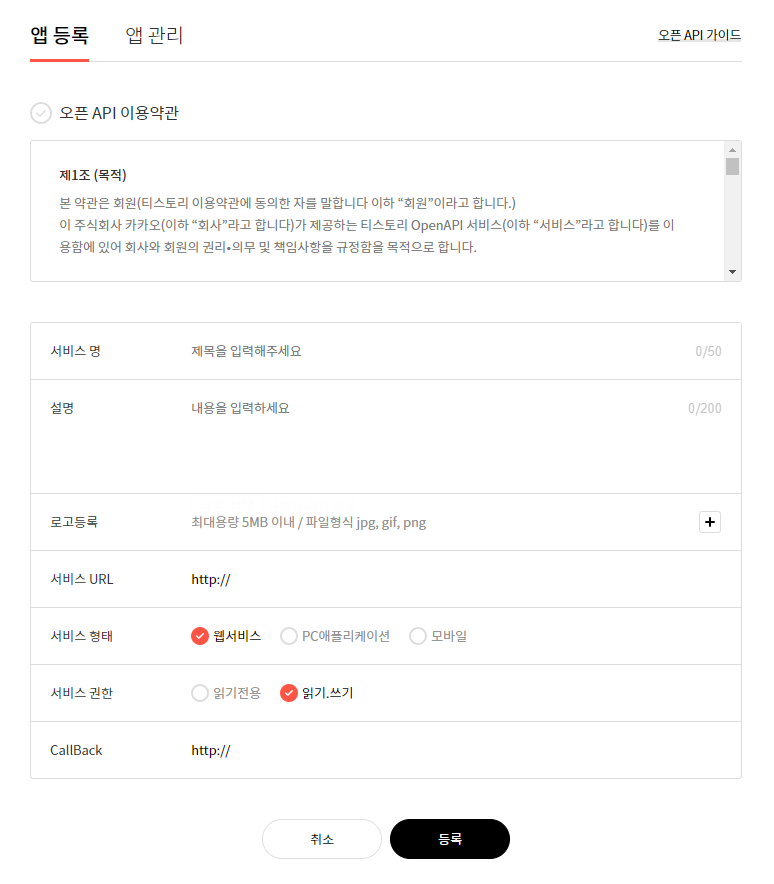

오픈 API 이용약관에 동의한 후 서비스 명, 설명을 적당히 적어줍니다. 서비스 URL과 CallBack에는 자신의 티스토리 블로그 주소를 입력합니다. 

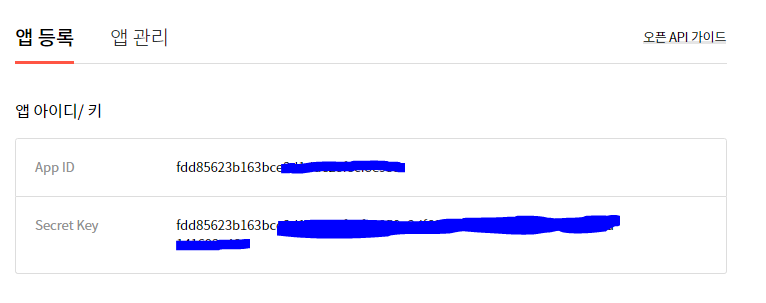

등록 버튼을 누르면 위와 같이 **App ID**와 **Secret Key**가 발급된 것을 확인할 수 있습니다. 이 값들을 메모장에 복사해둡니다.

## Python tistory 라이브러리 설치

이제 pip 명령으로 tistory 파이썬 라이브러리를 설치합니다.

```bash
pip install tistory
```

## tistory 라이브러리 임포트하기

tistory 라이브러리를 아래와 같이 임포트합니다. 자신의 블로그 주소를 **blog_url** 변수에 할당하고, 위에서 복사해둔 **App ID**와 **Secret Key**를 각각 **client_id**와 **client_secret** 변수에 할당해줍니다.

**Tistory()** 명령을 이용해 티스토리 자동화에 사용할 인스턴스인 **ts**를 생성합니다. 정상적으로 인스턴스를 생성했다면 tistory 인증 URL이 출력되는데, 이 URL을 복사해 웹 브라우저에서 접속합니다.

In [31]:
from tistory import Tistory, Auto
# 블로그 주소
blog_url = "https://티스토리 블로그 주소"
# 클라이언트 ID, SECRET
client_id = "발급받은 App ID"
client_secret = "발급받은 Secret Key"
# 티스토리 인스턴스 생성
ts = Tistory(blog_url, client_id, client_secret)

티스토리 오픈 API를 이용하기 위해서는 Access Token이라는 것이 필요한데, 이 값을 자동으로 추출해주는 **Auto**명령을 실행해 자동화 인스턴스를 생성합니다. 이 때, 블로그 계정 ID 및 PW를 입력해야 합니다. 이후 auth_code를 발급받고, 이 값을 이용해 Access Token을 추춣하는 명령을 호출해줍니다.

In [32]:
# 블로그 계정 정보
kakao_id = "블로그 계정 ID"
kakao_pw = "블로그 계정 PW"
# 자동화 인스턴스 생성
auto = Auto(kakao_id, kakao_pw)
# Authorization_code 자동 추출
auth_code = auto.get_access_token(ts.authentication_url)
# Access Token 초기화
ts.init_access_token(auth_code)

**ts.access_token**의 결과가 출력되면 Access Token을 정상적으로 발급받은 것입니다. 이 값은 토큰을 재발급받지 않는 한 유효하다고 알려져 있으므로 잘 복사해두고 사용하면 됩니다. 지금까지의 과정은 티스토리 블로그 자동화를 위해 최초 1회만 수행하면 됩니다. 이후에는 위 과정에서 발급받은 Access Token 값을 이용해 바로 API를 사용하도록 합니다.

In [30]:
ts.access_token

## 티스토리 블로그 오픈 API 기능 사용하기

유효한 **Access Token**이 존재한다면 이제 아래와 같이 언제든지 티스토리 블로그를 Python을 이용해 운영할 수 있습니다. 즉, 블로그 주소, App ID, Secret Key 그리고 Access Token 값만 있으면 API 사용이 가능합니다.

In [29]:
from tistory import Tistory

# 블로그 주소
blog_url = "https://티스토리 블로그 주소"
# 클라이언트 ID, SECRET
client_id = "발급받은 App ID"
client_secret = "발급받은 Secret Key"
# 티스토리 인스턴스 생성
ts = Tistory(blog_url, client_id, client_secret)
ts.access_token = "추출한 Access Token"

### 블로그 정보 API

자신의 블로그 정보를 가져오는 API 입니다.

**결과 항목**  

- id: 사용자 로그인 아이디
- userId: 사용자 id
- blogs
    - url: 티스토리 기본 url
    - secondaryUrl: 독립도메인 url
    - title: 블로그 타이틀
    - description: 블로그 설명
    - default: 대표블로그 여부 (Y/N)
    - blogIconUrl: 블로그 아이콘 URL
    - faviconUrl: 파비콘 URL
    - profileThumbnailImageUrl: 대표이미지 썸네일 URL
    - profileImageUrl: 대표이미지 URL
    - blogId: 블로그 아이디
    - nickname: 블로그에서의 닉네임
    - role: 블로그 권한
    - statistics: 블로그 컨텐츠 개수
        - post: 글 수
        - comment: 댓글 수
        - trackback: 트랙백 수
        - guestbook: 방명록 수
        - invitation: 초대장 수

In [24]:
ts.blog_info()

### 글 목록 API

블로그 글 목록를 가져오는 API 입니다.

**입력 항목**  
- page: 불러올 페이지 번호입니다.

**결과 항목**  

- url: 티스토리 기본 url
- secondaryUrl: 독립도메인 url
- page: 현재 페이지
- count: 페이지의 글 개수
- totalCount: 전체 글 수
- posts: 글 리스트
    - id: 글 ID
    - title: 글 제목
    - postUrl: 글 대표 주소
    - visibility: 글 공개 단계 (0: 비공개, 15: 보호, 20: 발행)
    - categoryId: 카테고리 ID
    - comments: 댓글 수
    - trackbacks: 트랙백 수
    - date: YYYY-mm-dd HH:MM:SS

In [28]:
page_number = 1
ts.list_post(page_number)

### 글 읽기 API

글 ID로 글을 조회할 수 있습니다.

**입력 항목**  

- postId: 글 ID


**결과 항목**  

- url
- secondaryUrl
- id: 글 ID
- title: 글 제목
- content: 내용
- categoryId: 카테고리 ID
- postUrl: 글 대표주소
- visibility: 글 공개 단계
- acceptComment: 댓글 허용 여부(허용: 1, 비허용: 0)
- tags
    - tag: 태그
- comments: 댓글 개수
- date: 발행시간 timestamp

In [27]:
post_id = 10
ts.read_post(post_id)

### 글 작성 API

블로그에 글을 작성하는 API 입니다.

**입력 항목**  

- blogName: Blog Name (필수)
- title: 글 제목 (필수)
- content: 글 내용
- visibility: 발행상태 (0: 비공개 - 기본값, 1: 보호, 3: 발행)
- category: 카테고리 아이디 (기본값: 0)
- published: 발행시간 (TIMESTAMP 이며 미래의 시간을 넣을 경우 예약. 기본값: 현재시간)
- slogan: 문자 주소
- tag: 태그 (',' 로 구분)
- acceptComment: 댓글 허용 (0, 1 - 기본값)
- password: 보호글 비밀번호

**결과 항목**  

- postId: 글 번호
- url: 발행 주소

In [26]:
# 글 작성
title = "티스토리 파이썬 테스트 타이틀"
content = f"""
티스토리 파이썬 테스트 컨텐츠
"""
visibility = "3"           # 발행상태 (0: 비공개 - 기본값, 1: 보호, 3: 발행)
acceptComment = "1"        # 댓글 허용 (0, 1 - 기본값)

# 글 작성 실행
ts.write_post(title=title, 
              content=content, 
              visibility=visibility, 
              acceptComment=acceptComment)

### 글 수정 API

블로그에 글을 수정하는 API 입니다.

**입력 항목**  

- blogName: Blog Name (필수)
- postId: 글 번호 (필수)
- title: 글 제목 (필수)
- content: 글 내용
- visibility: 발행상태 (0: 비공개 - 기본값, 1: 보호, 3: 발행)
- category: 카테고리 아이디 (기본값: 0)
- published: 발행시간 (TIMESTAMP 이며 미래의 시간을 넣을 경우 예약. 기본값: 현재시간)
- slogan: 문자 주소
- tag: 태그 (',' 로 구분)
- acceptComment: 댓글 허용 (0, 1 - 기본값)
- password: 보호글 비밀번호

**결과 항목**  

- postId: 글 번호
- url: 발행 주소

In [37]:
ts.modify_post(postId=5, 
               title='수정', 
               content='수정')

### 카테고리 목록 API

카테고리 목록을 가져오는 API 입니다.

**결과 항목**  

- id: 카테고리 ID
- name: 카테고리 이름
- parent: 부모 카테고리 ID
- label: 부모 카테고리를 포함한 전체 이름 ('/'로 구분)
- entries: 카테고리내 글 수

In [36]:
ts.list_category()

### 최근 댓글 목록 API

최근 댓글 목록을 가져오는 API 입니다.


**입력 항목**  

- page: 가져올 페이지 (기본값: 1)
- count: 페이지당 댓글 수 (기본값: 10, 최대값: 10)

**결과 항목**  

- id: 댓글 ID
- date: 댓글 작성시간 (TIMESTAMP)
- postId: 작성된 글 ID
- name: 작성자 이름
- homepage: 작성자 홈페이지 주소
- comment: 댓글 내용
- open: 댓글 공개여부 (Y: 공개, N: 비공개)

In [34]:
ts.newest_comment()

### 댓글 목록 API

게시글 댓글 목록을 가져오는 API 입니다.


**입력 항목**  

- postId: 글 ID

**결과 항목**  

- id: 댓글 ID
- date: 댓글 작성시간 (TIMESTAMP)
- name: 작성자 이름
- parentId: 부모 댓글 ID (대댓글인 경우만 사용)
- homepage: 작성자 홈페이지 주소
- visibility: 승인 여부 (0: 승인대기, 2: 승인)
- comment: 댓글 내용
- open: 댓글 공개여부 (Y: 공개, N: 비공개)

In [33]:
post_id=10
ts.list_comment(post_id)

### 댓글 작성 API

게시글에 댓글/대댓글을 작성하는 API 입니다.

**입력 항목**  

- postId: 글 ID (필수)
- parentId: 부모 댓글 ID (대댓글인 경우 사용)
- content: 댓글 내용
- secret: 비밀 댓글 여부 (1: 비밀댓글, 0: 공개댓글 - 기본 값)

**결과 항목**  

- commentUrl: 댓글 바로가기 링크


In [25]:
ts.write_comment(postId=10, content="Python")

### 댓글 수정 API

댓글/대댓글을 수정하는 API 입니다.


**입력 항목**  

- postId: 글 ID (필수)
- commentId: 댓글 ID (필수)
- parentId: 부모 댓글 ID (대댓글인 경우 사용)
- content: 댓글 내용
- secret: 비밀 댓글 여부 (1: 비밀댓글, 0: 공개댓글 - 기본 값)

**결과 항목**  

- commentUrl: 댓글 바로가기 링크

In [ ]:
ts.modify_comment(postId=10, commentId=13172618, content="댓글 수정")

### 댓글 삭제 API

댓글/대댓글을 수정하는 API 입니다.


**입력 항목**  

- blogName: Blog Name (필수)
- postId: 글 ID (필수)
- commentId: 댓글 ID (필수)

**결과 항목**  

- status: 결과

In [ ]:
ts.delete_comment(postId=11, commentId=13172620)